# Info
Name: Nik Faiz Afiq bin Nik Ab Rahman<br>
Student ID: 17217542<br>
Course: WQD7006 Machine Learnig, Universiti Malaya

# Objective
1. Predict the coronavirus trend
2. Listing the country that have worried trend( upward trend) and also countries that are doing well


# Preprocessing
1.	Data Merging
2.	Needs to be unpivoted (merge the dates to 1 column only)
3.	Check for missing value
4.	Calculate for new columns: Total Active
5.	Calculate for new columns: New Confirmed, New Death, and New Recovered



# Exploratory Analysis
1.	Filter the data to only include last 7 days
2.	Standardize it based on the country before calculating the gradient (the new confirmed cases are standardized so it falls within 0 and 1 in each country)
3.	Calculate the gradient for each of the country based on their last 7 new cases
4.	Categorize the status based on the gradient
5.	Visualize total country that have increasing, decreasing or same gradient
6.	Plot top 10 performers and bottom 10 performers



# Modeling
1. Use the model to predict the number of new cases (X- date, Y-number of new cases)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os


# Initial data import

In [2]:
root_folder = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

confirmed_df = pd.read_csv(root_folder+"time_series_covid19_confirmed_global.csv")
death_df = pd.read_csv(root_folder+"time_series_covid19_deaths_global.csv")
recovered_df = pd.read_csv(root_folder+"time_series_covid19_recovered_global.csv")



In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875


In [4]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2257,2264,2277,2288,2301,2301,2314,2324,2336,2339
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1230,1233,1241,1247,1252,1256,1261,1265,1270,1277
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2798,2803,2807,2812,2816,2819,2822,2827,2831,2836
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,84,85,85,85,86,87,88,88,91,91
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,415,416,416,420,422,424,425,428,431,436


In [5]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,43440,43740,43948,44137,44608,44850,45298,45434,45465,45868
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,36971,37327,37648,37981,38421,38860,39246,39625,40090,40453
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,68802,69011,69212,69403,69608,69791,69992,70188,70373,70554
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7724,7724,7724,7724,7930,8070,8091,8116,8116,8154
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,12712,13205,13872,14825,15512,15631,16008,16120,16225,16347


# Preprocessing

1. Unpivot and merge all 3 data

In [6]:
confirmed_melt = pd.melt(confirmed_df, id_vars = ['Province/State', 'Country/Region','Lat','Long'],
                         value_vars = confirmed_df.columns[4:],
                         var_name = "Date",value_name = 'Confirmed')
death_melt = pd.melt(death_df, id_vars = ['Province/State', 'Country/Region','Lat','Long'],
                         value_vars = death_df.columns[4:],
                         var_name = "Date",value_name = 'Death')
recovered_melt = pd.melt(recovered_df, id_vars = ['Province/State', 'Country/Region','Lat','Long'],
                         value_vars = recovered_df.columns[4:],
                         var_name = "Date",value_name = 'Recovered')

confirmed_melt.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


2. Merging

In [7]:
merged1 = pd.merge(left = confirmed_melt ,right  = death_melt,how= "outer",
                  on = ['Province/State', 'Country/Region','Date','Lat','Long'])
merged_df = pd.merge(left = merged1 ,right  = recovered_melt,how= "outer",
                  on = ['Province/State', 'Country/Region','Date','Lat','Long'])
print(merged_df.shape)
merged_df.head()

(100636, 8)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0.0,0.0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0.0,0.0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0.0,0.0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0.0,0.0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0.0,0.0,0.0


3. handling missing data

In [8]:
# percentage of missing data
merged_df.isnull().sum()/merged_df.shape[0]

Province/State    0.690647
Country/Region    0.000000
Lat               0.003597
Long              0.003597
Date              0.000000
Confirmed         0.021583
Death             0.021583
Recovered         0.075540
dtype: float64

In [9]:
# missing value of recovered with 0
merged_df['Recovered'] = merged_df['Recovered'].fillna(0)  

# change the values to integer
merged_df['Recovered'] = merged_df['Recovered'].astype('int') 

# missing value of province/state with ' '
merged_df['Province/State'] = merged_df['Recovered'].fillna(' ')

# Add active column
merged_df['Active'] = merged_df['Confirmed']-merged_df['Death'] - merged_df['Recovered'] 

In [10]:
merged_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered,Active
100631,379,China,37.8957,114.9042,1/17/21,NaN,NaN,379,NaN
100632,1273,China,33.8820,113.6140,1/17/21,NaN,NaN,1273,NaN
100633,18607,Mozambique,-18.6657,35.5296,1/17/21,NaN,NaN,18607,NaN
100634,6548,Syria,34.8021,38.9968,1/17/21,NaN,NaN,6548,NaN
100635,49,Timor-Leste,-8.8742,125.7275,1/17/21,NaN,NaN,49,NaN


3. Convert date types

In [11]:
print(merged_df['Date'].describe())

merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.normalize()

print(merged_df['Date'].describe(datetime_is_numeric=True))
merged_df['Date']

count      100636
unique        362
top       5/20/20
freq          278
Name: Date, dtype: object
count                           100636
mean     2020-07-20 11:59:59.999980544
min                2020-01-22 00:00:00
25%                2020-04-21 00:00:00
50%                2020-07-20 12:00:00
75%                2020-10-19 00:00:00
max                2021-01-17 00:00:00
Name: Date, dtype: object


0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
100631   2021-01-17
100632   2021-01-17
100633   2021-01-17
100634   2021-01-17
100635   2021-01-17
Name: Date, Length: 100636, dtype: datetime64[ns]

4. Save file to csv

In [12]:
merged_df.to_csv('data/covid19_cleaned.csv',index=False)

In [13]:
print(merged_df.shape)
merged_df.head()

(100636, 9)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered,Active
0,0,Afghanistan,33.93911,67.709953,2020-01-22,0.0,0.0,0,0.0
1,0,Albania,41.15330,20.168300,2020-01-22,0.0,0.0,0,0.0
2,0,Algeria,28.03390,1.659600,2020-01-22,0.0,0.0,0,0.0
3,0,Andorra,42.50630,1.521800,2020-01-22,0.0,0.0,0,0.0
4,0,Angola,-11.20270,17.873900,2020-01-22,0.0,0.0,0,0.0


#### New Cases column

In [14]:
# grouped the data based on the country
new = merged_df.groupby(['Date','Country/Region'])['Confirmed','Death','Recovered','Active'].sum().reset_index()
print(new.shape)
new.head()

(69142, 6)


<ipython-input-14-cbcc3bf0d952>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new = merged_df.groupby(['Date','Country/Region'])['Confirmed','Death','Recovered','Active'].sum().reset_index()


,Date,Country/Region,Confirmed,Death,Recovered,Active
0,2020-01-22,Afghanistan,0.0,0.0,0,0.0
1,2020-01-22,Albania,0.0,0.0,0,0.0
2,2020-01-22,Algeria,0.0,0.0,0,0.0
3,2020-01-22,Andorra,0.0,0.0,0,0.0
4,2020-01-22,Angola,0.0,0.0,0,0.0


Creating new columns dataframe and merged it

In [15]:
new_col = merged_df.groupby(['Country/Region','Date'])['Confirmed','Death','Recovered'].sum().diff().reset_index()

new_col.columns = ['Country/Region', 'Date', 'New Confirmed', 'New Death', 'New Recovered']

# fix first row of the countries
first_rows = (new_col['Country/Region'] != new_col["Country/Region"].shift(1))
new_col.loc[first_rows,'New Confirmed'] = 0
new_col.loc[first_rows,'New Death'] = 0
new_col.loc[first_rows,'New Recovered'] = 0

print(new.head())
print(new_col.head())


# Merge the new values
df = pd.merge(new,new_col,on=['Country/Region','Date'], how = 'left')
df.head()

<ipython-input-15-2c6ecae3e656>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_col = merged_df.groupby(['Country/Region','Date'])['Confirmed','Death','Recovered'].sum().diff().reset_index()


        Date Country/Region  Confirmed  Death  Recovered  Active
0 2020-01-22    Afghanistan        0.0    0.0          0     0.0
1 2020-01-22        Albania        0.0    0.0          0     0.0
2 2020-01-22        Algeria        0.0    0.0          0     0.0
3 2020-01-22        Andorra        0.0    0.0          0     0.0
4 2020-01-22         Angola        0.0    0.0          0     0.0
  Country/Region       Date  New Confirmed  New Death  New Recovered
0    Afghanistan 2020-01-22            0.0        0.0            0.0
1    Afghanistan 2020-01-23            0.0        0.0            0.0
2    Afghanistan 2020-01-24            0.0        0.0            0.0
3    Afghanistan 2020-01-25            0.0        0.0            0.0
4    Afghanistan 2020-01-26            0.0        0.0            0.0


,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,Afghanistan,0.0,0.0,0,0.0,0.0,0.0,0.0
1,2020-01-22,Albania,0.0,0.0,0,0.0,0.0,0.0,0.0
2,2020-01-22,Algeria,0.0,0.0,0,0.0,0.0,0.0,0.0
3,2020-01-22,Andorra,0.0,0.0,0,0.0,0.0,0.0,0.0
4,2020-01-22,Angola,0.0,0.0,0,0.0,0.0,0.0,0.0


In [16]:
# Fix datatype for new column
df[ ['New Confirmed', 'New Death', 'New Recovered']] = df[ ['New Confirmed', 'New Death', 'New Recovered']].astype('int')


In [17]:
df

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,Afghanistan,0.0,0.0,0,0.0,0,0,0
1,2020-01-22,Albania,0.0,0.0,0,0.0,0,0,0
2,2020-01-22,Algeria,0.0,0.0,0,0.0,0,0,0
3,2020-01-22,Andorra,0.0,0.0,0,0.0,0,0,0
4,2020-01-22,Angola,0.0,0.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
69137,2021-01-17,Vietnam,1537.0,35.0,1380,122.0,0,0,0
69138,2021-01-17,West Bank and Gaza,152031.0,1718.0,139131,11182.0,462,18,636
69139,2021-01-17,Yemen,2112.0,612.0,1419,81.0,0,0,0
69140,2021-01-17,Zambia,37605.0,546.0,26159,10900.0,1531,9,1053


Export data to csv

In [18]:
df.to_csv('data/covid19_df.csv',index=False)

In [19]:
# NA check
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Death             0
Recovered         0
Active            0
New Confirmed     0
New Death         0
New Recovered     0
dtype: int64

## Latest date

In [20]:
# latest date df
latest_df = df[df["Date"] == df["Date"].max()]
latest_df.reset_index(drop= True,inplace=True)
latest_df

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2021-01-17,Afghanistan,53984.0,2339.0,45868,5777.0,46,3,403
1,2021-01-17,Albania,67690.0,1277.0,40453,25960.0,474,7,363
2,2021-01-17,Algeria,103833.0,2836.0,70554,30443.0,222,5,181
3,2021-01-17,Andorra,9083.0,91.0,8154,838.0,45,0,38
4,2021-01-17,Angola,18875.0,436.0,16347,2092.0,110,5,122
...,...,...,...,...,...,...,...,...,...
186,2021-01-17,Vietnam,1537.0,35.0,1380,122.0,0,0,0
187,2021-01-17,West Bank and Gaza,152031.0,1718.0,139131,11182.0,462,18,636
188,2021-01-17,Yemen,2112.0,612.0,1419,81.0,0,0,0
189,2021-01-17,Zambia,37605.0,546.0,26159,10900.0,1531,9,1053


## World Data

In [21]:
world_df = df.groupby(['Date']).sum().astype('int').reset_index()
world_df

,Date,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,557,17,30,510,0,0,0
1,2020-01-23,655,18,32,605,98,1,2
2,2020-01-24,941,26,39,876,286,8,7
3,2020-01-25,1433,42,42,1349,492,16,3
4,2020-01-26,2118,56,56,2006,685,14,14
...,...,...,...,...,...,...,...,...
357,2021-01-13,92355264,1978741,50994811,39999081,750197,16378,365385
358,2021-01-14,93110488,1994054,51363325,40379240,755224,15313,368514
359,2021-01-15,93876206,2009092,51685853,40816056,765718,15038,322528
360,2021-01-16,94495403,2022125,52005821,41108839,619197,13033,319968


## Statistics

In [22]:
# table for top 10 countries
latest_df.sort_values('Confirmed',ascending = False).head(10)

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
177,2021-01-17,US,23933368.0,397574.0,0,23535794.0,174513,1723,0
79,2021-01-17,India,10571773.0,152419.0,10211342,208012.0,13788,145,14457
23,2021-01-17,Brazil,8488099.0,209847.0,7509009,769243.0,33040,551,23186
141,2021-01-17,Russia,3530379.0,64601.0,2929255,536523.0,23178,467,23283
181,2021-01-17,United Kingdom,3405740.0,89429.0,8042,3308269.0,38670,682,180
62,2021-01-17,France,2969091.0,70422.0,215269,2683400.0,37405,329,1272
176,2021-01-17,Turkey,2387101.0,23997.0,2262864,100240.0,6436,165,8812
85,2021-01-17,Italy,2381277.0,82177.0,1745726,553374.0,12544,377,16510
161,2021-01-17,Spain,2252164.0,53314.0,150376,2048474.0,0,0,0
66,2021-01-17,Germany,2050129.0,46901.0,1709540,293688.0,11484,437,29061


# Exploratory Data Analysis

Trend for new cases within the last 7 days. <br>
need to standardize first so that the gradient is in the same unit<br>
Increasing, stays the same, or decreasing

In [31]:
df = pd.read_csv('data/covid19_df.csv')
df.head(5)

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,Afghanistan,0.0,0.0,0,0.0,0,0,0
1,2020-01-22,Albania,0.0,0.0,0,0.0,0,0,0
2,2020-01-22,Algeria,0.0,0.0,0,0.0,0,0,0
3,2020-01-22,Andorra,0.0,0.0,0,0.0,0,0,0
4,2020-01-22,Angola,0.0,0.0,0,0.0,0,0,0


In [23]:
# Filter to last 7 days of data
weekly_df = df[df["Date"] > (df["Date"].max()-pd.offsets.Day(7))]
weekly_df.reset_index(drop= True,inplace=True)
weekly_df

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2021-01-11,Afghanistan,53538.0,2288.0,44137,7113.0,49,11,189
1,2021-01-11,Albania,63971.0,1247.0,37981,24743.0,376,6,333
2,2021-01-11,Algeria,102369.0,2812.0,69403,30154.0,225,5,191
3,2021-01-11,Andorra,8586.0,85.0,7724,777.0,0,0,0
4,2021-01-11,Angola,18254.0,420.0,14825,3009.0,61,4,953
...,...,...,...,...,...,...,...,...,...
1332,2021-01-17,Vietnam,1537.0,35.0,1380,122.0,0,0,0
1333,2021-01-17,West Bank and Gaza,152031.0,1718.0,139131,11182.0,462,18,636
1334,2021-01-17,Yemen,2112.0,612.0,1419,81.0,0,0,0
1335,2021-01-17,Zambia,37605.0,546.0,26159,10900.0,1531,9,1053


In [32]:
# Standardizing the value before calculating the gradient
# 
# devide by max value then times 10 (x value will be between 0 and 10)
# so gradient value standardized based on the max value

def gradient_find(x):
    return np.polyfit(range(len(x)), x/max(x)*10, 1)[0]

def corr_find(x):
    return np.corrcoef(range(len(x)), x)[0,1]

In [49]:
weekly = weekly_df.groupby(['Country/Region'])['New Confirmed'].apply(gradient_find).reset_index()
weekly.rename(columns={"New Confirmed": "gradient"},inplace=True)

weekly['COVID19 Trend (7d)'] = ["increasing" if x>0.2  else "decreasing" if x<-0.2 else "No cases" if np.isnan(x)
                                else "around the same" for x in weekly ['gradient'] ]
weekly


,Country/Region,gradient,COVID19 Trend (7d)
0,Afghanistan,0.316006,increasing
1,Albania,0.039402,around the same
2,Algeria,-0.076155,around the same
3,Andorra,0.181197,around the same
4,Angola,0.237462,increasing
...,...,...,...
186,Vietnam,-0.250000,decreasing
187,West Bank and Gaza,-0.816390,decreasing
188,Yemen,-1.071429,decreasing
189,Zambia,0.674913,increasing


In [50]:
weekly[weekly['gradient'].isna()]

,Country/Region,gradient,COVID19 Trend (7d)
33,Central African Republic,NaN,No cases
48,Diamond Princess,NaN,No cases
75,Holy See,NaN,No cases
95,Laos,NaN,No cases
104,MS Zaandam,NaN,No cases
111,Marshall Islands,NaN,No cases
143,Saint Kitts and Nevis,NaN,No cases
146,Samoa,NaN,No cases
157,Solomon Islands,NaN,No cases
169,Tajikistan,NaN,No cases


In [51]:
weekly = weekly.sort_values("gradient",ascending=True).reset_index(drop=True)
weekly

,Country/Region,gradient,COVID19 Trend (7d)
0,Uganda,-1.568878,decreasing
1,Luxembourg,-1.519435,decreasing
2,Papua New Guinea,-1.500000,decreasing
3,San Marino,-1.465201,decreasing
4,Switzerland,-1.416745,decreasing
...,...,...,...
186,Samoa,NaN,No cases
187,Solomon Islands,NaN,No cases
188,Tajikistan,NaN,No cases
189,Tanzania,NaN,No cases


In [55]:
weekly['COVID19 Trend (7d)'].value_counts()

decreasing         67
around the same    56
increasing         56
No cases           12
Name: COVID19 Trend (7d), dtype: int64

<AxesSubplot:>

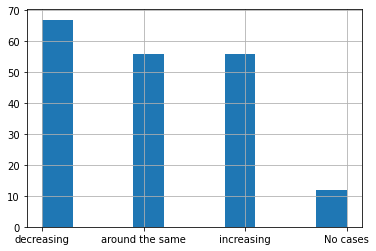

In [56]:
weekly['COVID19 Trend (7d)'].hist()

In [75]:
weekly_inc = weekly[weekly['COVID19 Trend (7d)'] == "increasing"].sort_values("gradient",ascending=False).reset_index(drop=True)
weekly_inc.head(10)

,Country/Region,gradient,COVID19 Trend (7d)
0,Madagascar,1.071429,increasing
1,Guinea-Bissau,1.071429,increasing
2,Trinidad and Tobago,1.018519,increasing
3,Burundi,0.896359,increasing
4,Cabo Verde,0.808571,increasing
5,Malawi,0.777481,increasing
6,Fiji,0.714286,increasing
7,Portugal,0.712067,increasing
8,Thailand,0.708061,increasing
9,Zambia,0.674913,increasing


In [73]:
weekly_dec = weekly[weekly['COVID19 Trend (7d)'] == "decreasing"].sort_values("gradient",ascending=True).reset_index(drop=True)
weekly_dec.head(10)

,Country/Region,gradient,COVID19 Trend (7d)
0,Uganda,-1.568878,decreasing
1,Luxembourg,-1.519435,decreasing
2,Papua New Guinea,-1.500000,decreasing
3,San Marino,-1.465201,decreasing
4,Switzerland,-1.416745,decreasing
5,Costa Rica,-1.389894,decreasing
6,Benin,-1.374092,decreasing
7,Spain,-1.359529,decreasing
8,Bulgaria,-1.260000,decreasing
9,Mauritius,-1.250000,decreasing


In [76]:
weekly_same = weekly[weekly['COVID19 Trend (7d)'] == "around the same"].sort_values("gradient",ascending=False).reset_index(drop=True)
weekly_same.head(10)

,Country/Region,gradient,COVID19 Trend (7d)
0,Cameroon,0.197117,around the same
1,Saudi Arabia,0.186688,around the same
2,Estonia,0.185480,around the same
3,Andorra,0.181197,around the same
4,Belgium,0.162038,around the same
5,Belarus,0.139271,around the same
6,Brazil,0.129220,around the same
7,Italy,0.094220,around the same
8,Belize,0.088063,around the same
9,Congo (Kinshasa),0.073529,around the same


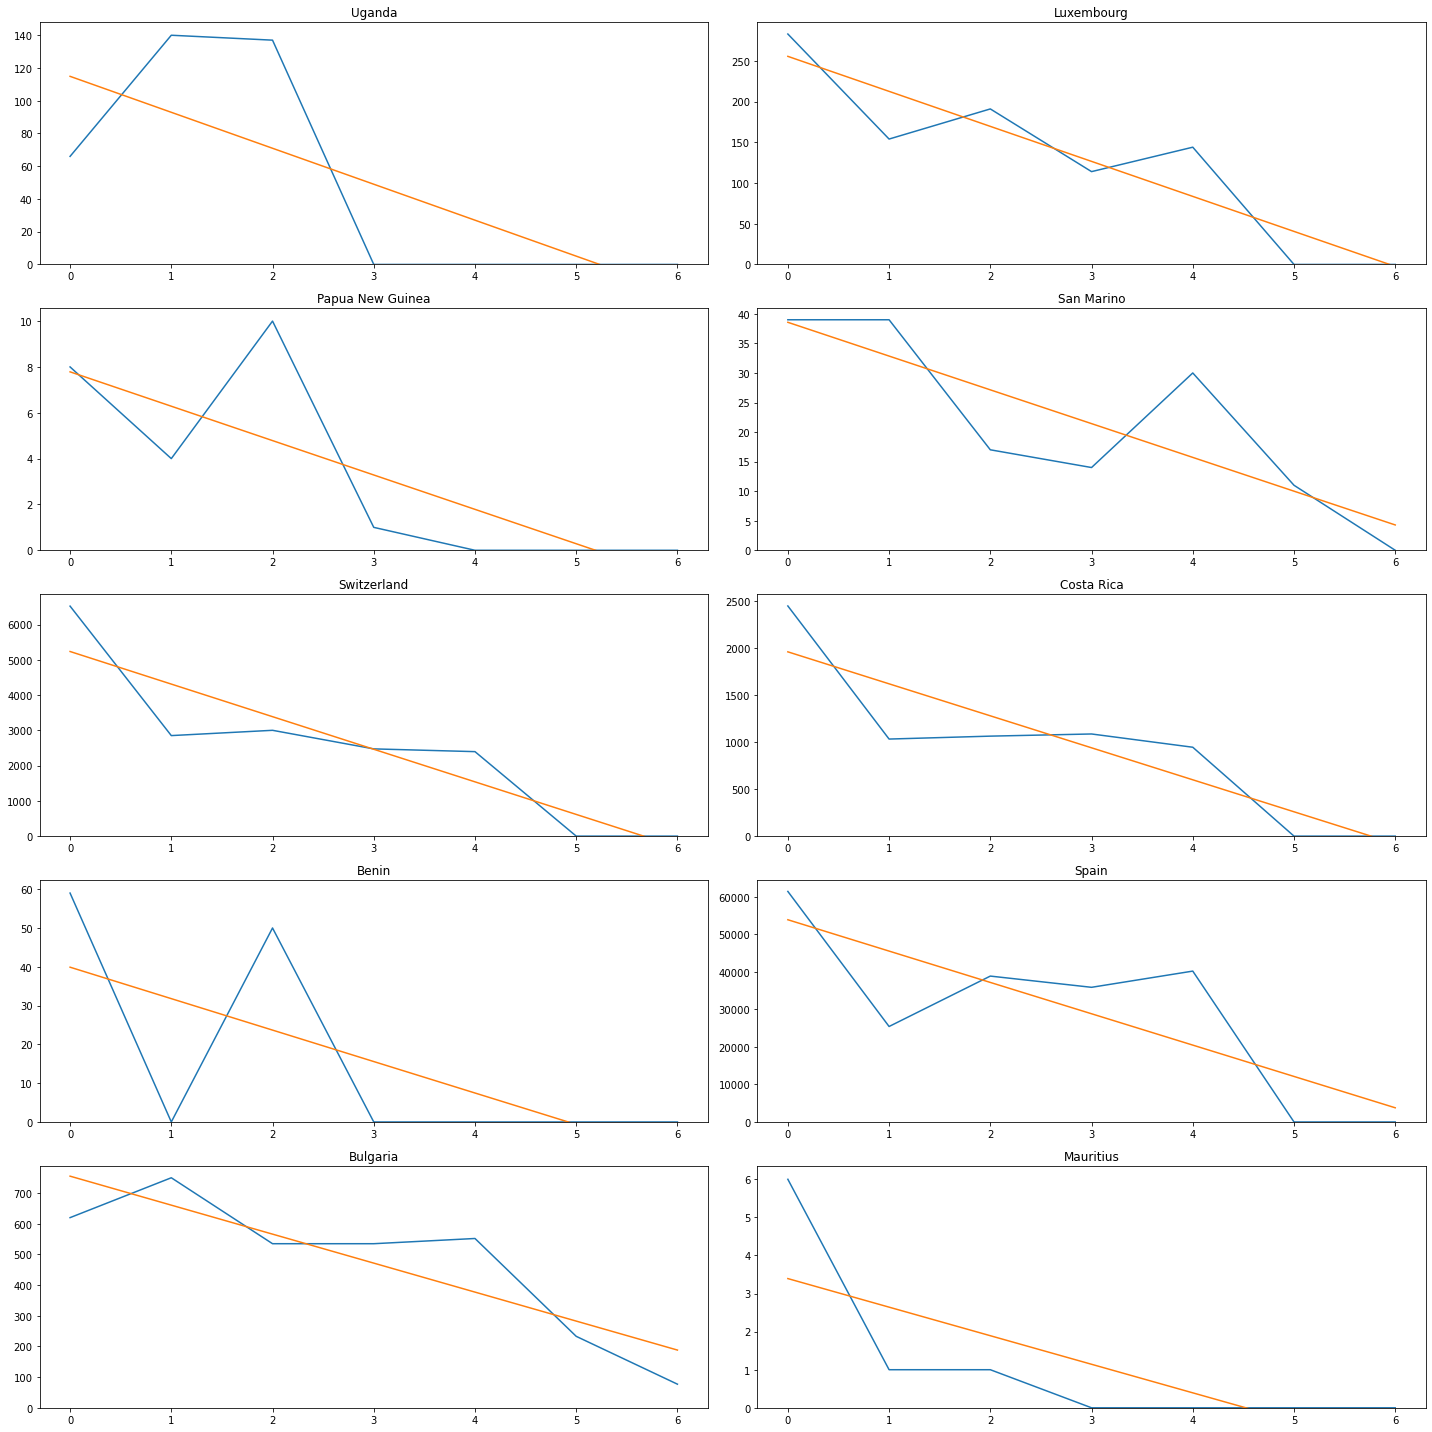

In [72]:
# Top 10 countries with decreasing new cases in last 7 days
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()
for i in range(10):
    country = weekly_dec['Country/Region'][i]
    d = weekly_df[weekly_df['Country/Region'] == country]['New Confirmed']
    m, b = np.polyfit(range(len(d)), d, 1)
    ax[i].plot(range(len(d)),d)
    ax[i].plot(range(len(d)), m*range(len(d)) + b)
    ax[i].set_title(country)
    ax[i].axis(ymin=0)

fig.tight_layout()
plt.show()

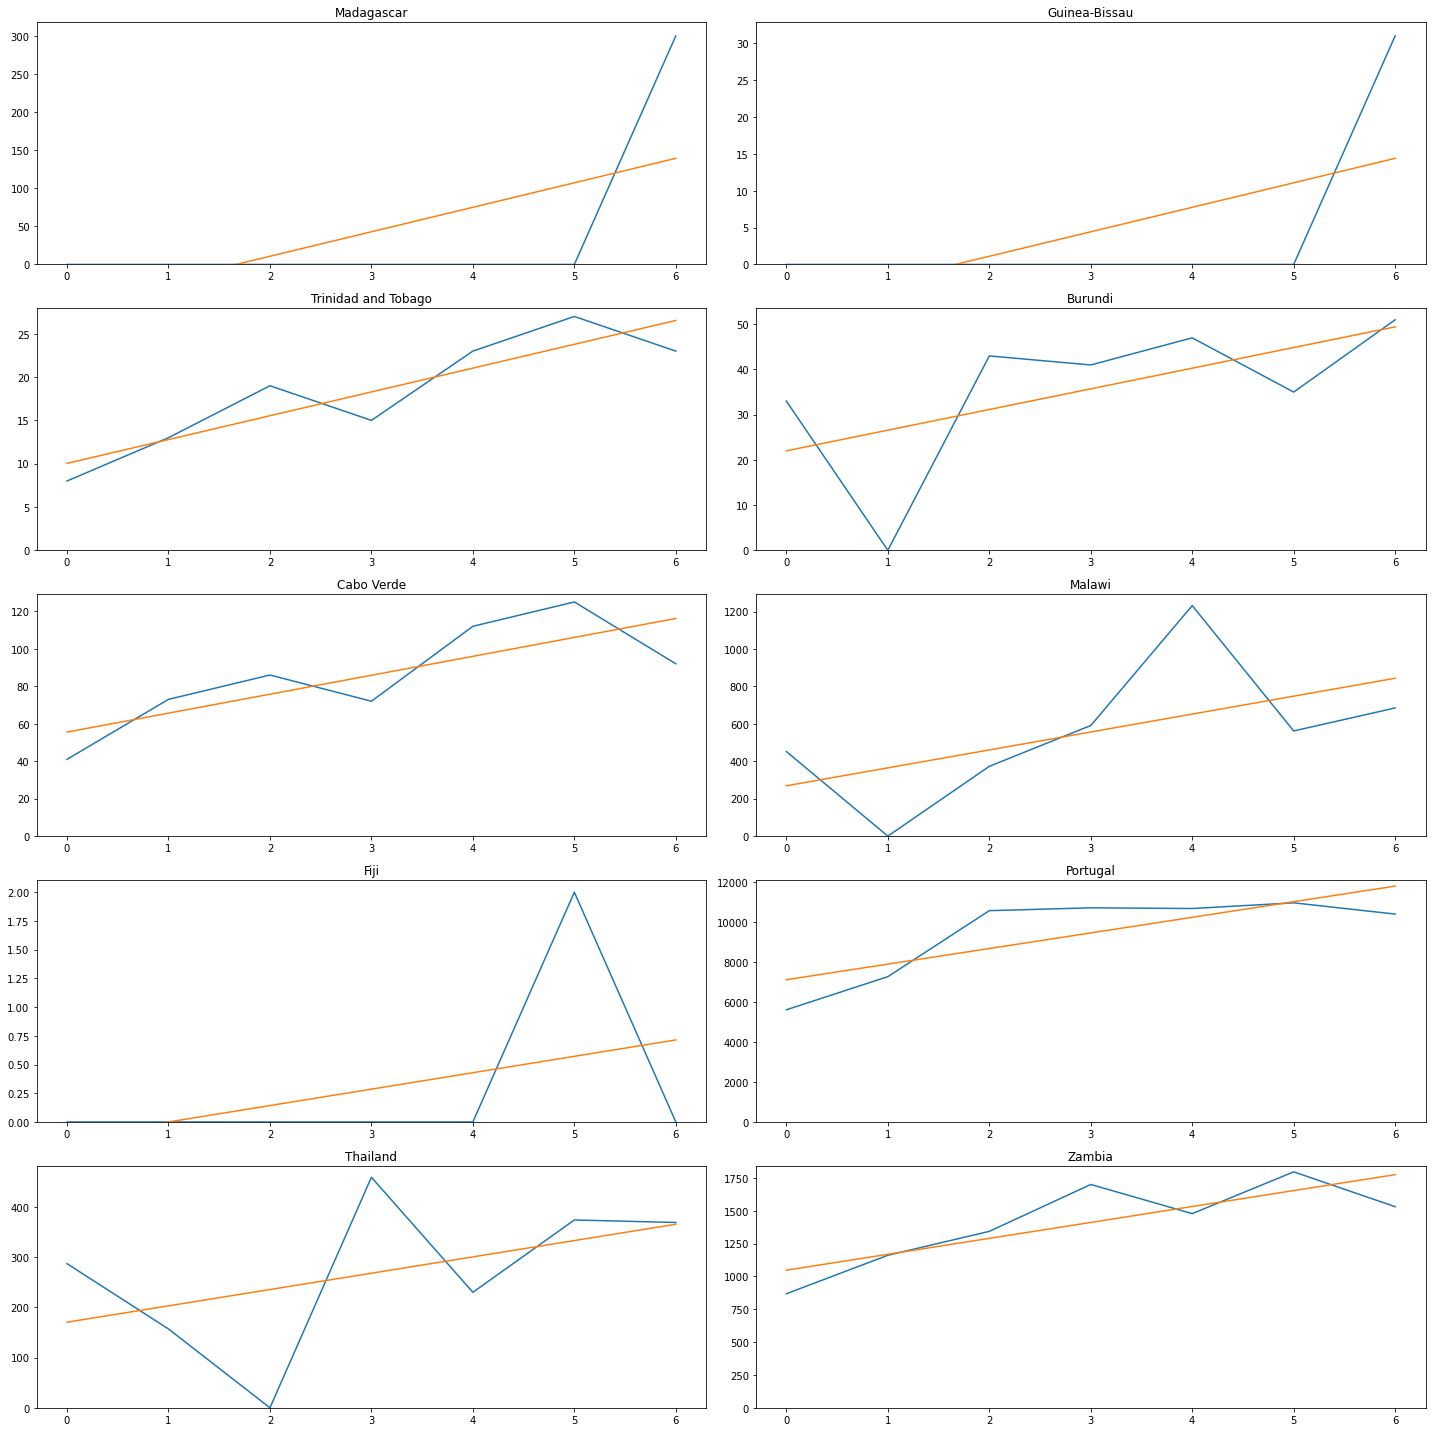

In [77]:
# Bottom 10 countries with increasing new cases within last 7 days
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()
for i in range(10):
    country = weekly_inc['Country/Region'][i]
    d = weekly_df[weekly_df['Country/Region'] == country]['New Confirmed']
    m, b = np.polyfit(range(len(d)), d, 1)
    ax[i].plot(range(len(d)),d)
    ax[i].plot(range(len(d)), m*range(len(d)) + b)
    ax[i].set_title(country)
    ax[i].axis(ymin=0)

fig.tight_layout()
plt.show()

real coef: 26.214285714285715
real gradient: 1.071428571428572


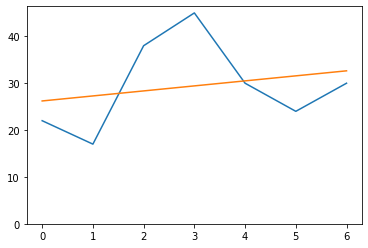

In [62]:
country = 'Singapore'
d = weekly_df[weekly_df['Country/Region'] == country]['New Confirmed']

m, b = np.polyfit(range(len(d)), d, 1)

print("real coef:",b)
print("real gradient:",m)

#fig = plt.figure(figsize=(13,8))
plt.plot(range(len(d)),d)
plt.plot(range(len(d)), m*range(len(d)) + b)
plt.ylim(0) 
plt.show()

In [63]:
print(list(weekly['Country/Region'][:5]))
print(list(weekly['Country/Region'][-5:]))

['Uganda', 'Luxembourg', 'Papua New Guinea', 'San Marino', 'Switzerland']
['Samoa', 'Solomon Islands', 'Tajikistan', 'Tanzania', 'Vanuatu']


top 10 new cases trend countries:
- 'Tajikistan', 'New Zealand', 'Azerbaijan', 'Mongolia', 'Ghana'

worst 10 new cases trend countries:
- 'Sierra Leone', 'Portugal', 'Guyana', 'Singapore', 'Malawi'

most countries still have increasing covid-19 cases within last 7 days- which is worrying.

## World COVID-19 cases


In [78]:
world_df

,Date,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,557,17,30,510,0,0,0
1,2020-01-23,655,18,32,605,98,1,2
2,2020-01-24,941,26,39,876,286,8,7
3,2020-01-25,1433,42,42,1349,492,16,3
4,2020-01-26,2118,56,56,2006,685,14,14
...,...,...,...,...,...,...,...,...
357,2021-01-13,92355264,1978741,50994811,39999081,750197,16378,365385
358,2021-01-14,93110488,1994054,51363325,40379240,755224,15313,368514
359,2021-01-15,93876206,2009092,51685853,40816056,765718,15038,322528
360,2021-01-16,94495403,2022125,52005821,41108839,619197,13033,319968


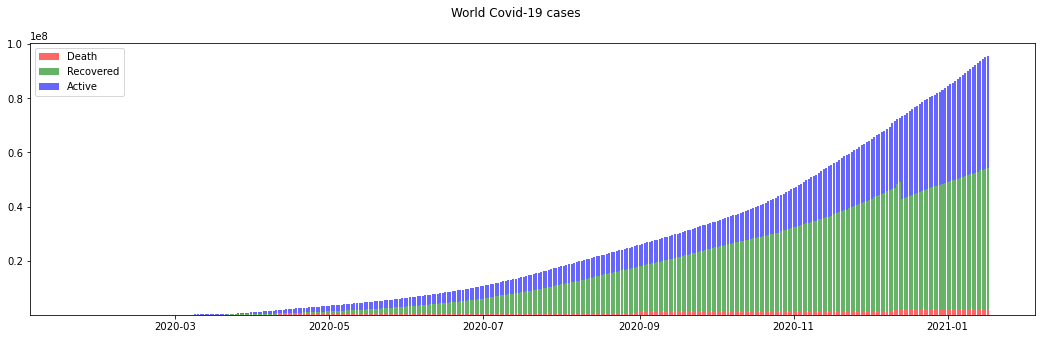

In [79]:
fig = plt.figure(figsize=(18,5))
plt.suptitle('World Covid-19 cases')
# fig, ax = plt.subplots()

plt.bar(world_df['Date'],world_df['Death'].values,color = 'red',alpha=0.6,label='Death')
plt.bar(world_df['Date'],world_df['Recovered'].values,color = 'green',alpha=0.6,label='Recovered',
       bottom = world_df['Death'])
plt.bar(world_df['Date'],world_df['Active'].values,color = 'blue',alpha=0.6,label='Active',
       bottom = world_df['Death']+world_df['Recovered'])


plt.legend(loc='upper left')
plt.show()

# Modeling

Predict how many new cases in the next 20 days

In [80]:
# train-split test

# use integer 0,1,2,3,4,... for x for easier computation and analysis
X = world_df['Date'].values.reshape(-1, 1)
X = np.array(range(len(world_df['Date']))).reshape(-1,1)


y = world_df['New Confirmed']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42 ,train_size = 0.7)

In [81]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(253, 1)
(109, 1)
(253,)
(109,)


In [82]:
#Creting X for forecasting 20days into the future
Xforecast = np.array(range(int(max(X)),int(max(X))+20)).reshape(-1,1)

# Initializing score table 
score = pd.DataFrame(columns = ["Model","MAE","RMSE",'R2 Score'])

# Initializing prediction table
pred_list  = pd.DataFrame()
pred_list.insert(0,"date",pd.Series(pd.date_range("2021-01-01", periods=20, freq="D")))

In [83]:
# dir(score)
# score.insert()

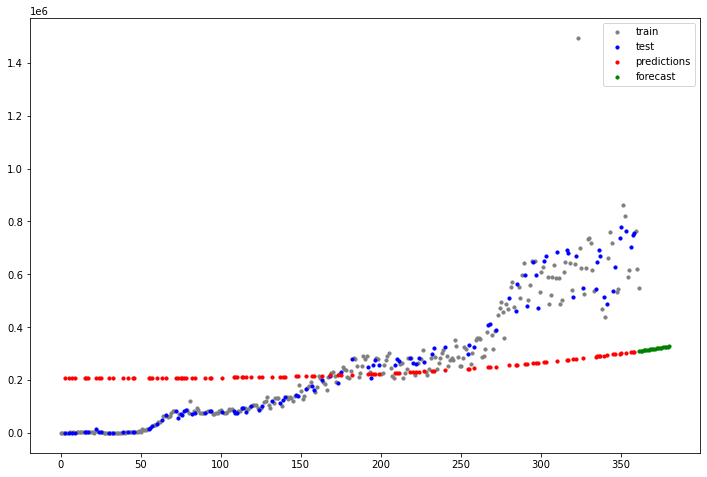

In [84]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import confusion_matrix


# svr = SVR(kernel='poly')
svr = SVR(kernel='poly')
svr.fit(Xtrain,ytrain)
ypred = svr.predict(Xtest)
yforecast = svr.predict(Xforecast)


from contextlib import suppress

with suppress(Exception):
    score = score.append({
        "Model":'Support Vector Regression',
        "MAE": round(metrics.mean_absolute_error(ypred,ytest),2),
        "RMSE": round(metrics.mean_squared_error(ytest,ypred,squared=False),2),
        "R2 Score": round(metrics.r2_score(ypred,ytest),2)
    },ignore_index = True)
    
    pred_list.insert(1,"Support Vector Regression",yforecast)



plt.figure(figsize=(12,8))
plt.plot()
plt.scatter(Xtrain,ytrain,label = 'train',c = 'grey',s=10)
plt.scatter(Xtest,ytest,label = 'test',color ='blue',s=10)
plt.scatter(Xtest,ypred,label = 'predictions',color = 'red',s=10)
plt.scatter(Xforecast,yforecast,label = 'forecast',color = 'green',s=10)
plt.legend()


                       Model        MAE       RMSE  R2 Score
0  Support Vector Regression  177688.41  215668.40    -44.62
1          Linear Regression   58131.40   72334.89      0.90


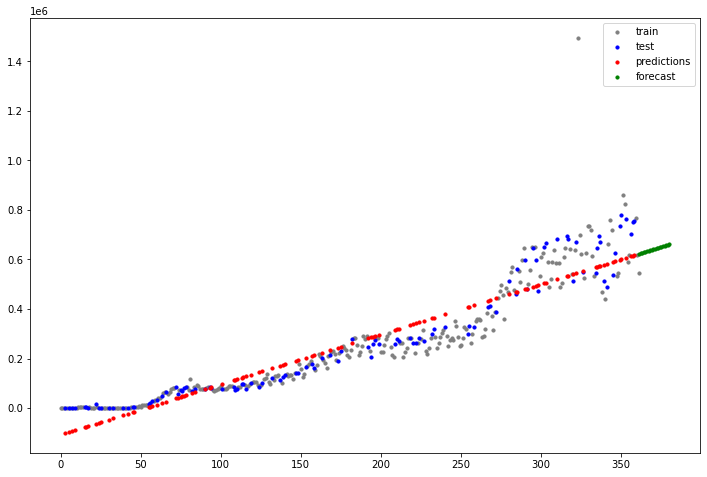

In [85]:
# Simple Linear regression

from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(Xtrain,ytrain)
ypred = lin_reg.predict(Xtest)
yforecast = lin_reg.predict(Xforecast)

with suppress(Exception):
    score = score.append({
        "Model":'Linear Regression',
        "MAE": round(metrics.mean_absolute_error(ypred,ytest),2),
        "RMSE": round(metrics.mean_squared_error(ytest,ypred,squared=False),2),
        "R2 Score": round(metrics.r2_score(ypred,ytest),2)
    },ignore_index = True)
    pred_list.insert(2,"Linear Regression",yforecast)
    
print(score)


plt.figure(figsize=(12,8))
plt.plot()
plt.scatter(Xtrain,ytrain,label = 'train',c = 'grey',s=10)
plt.scatter(Xtest,ytest,label = 'test',color ='blue',s=10)
plt.scatter(Xtest,ypred,label = 'predictions',color = 'red',s=10)
plt.scatter(Xforecast,yforecast,label = 'forecast',color = 'green',s=10)
plt.legend()


                       Model        MAE       RMSE  R2 Score
0  Support Vector Regression  177688.41  215668.40    -44.62
1          Linear Regression   58131.40   72334.89      0.90
2      Polynomial Regression   34931.38   51009.30      0.95


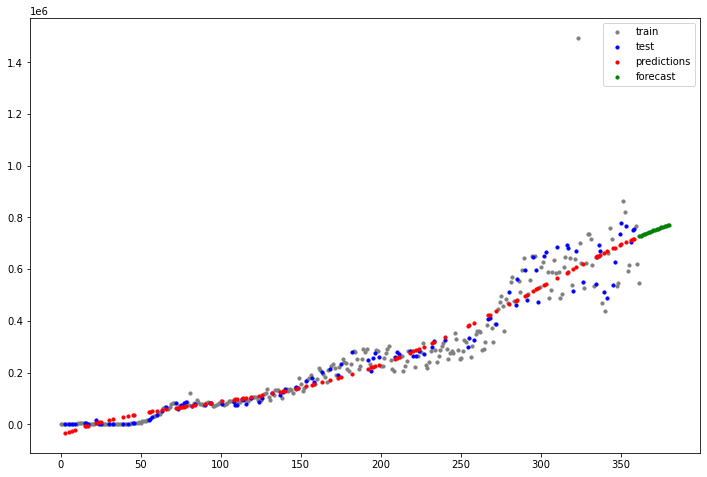

In [86]:
# polynomial regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4)

poly_Xtrain = poly_features.fit_transform(Xtrain) 
poly_Xtest = poly_features.fit_transform(Xtest)
poly_Xforecast = poly_features.fit_transform(Xforecast)

poly_reg = LinearRegression()
poly_reg.fit(poly_Xtrain,ytrain)
ypred = poly_reg.predict(poly_Xtest)
yforecast = poly_reg.predict(poly_Xforecast)

with suppress(Exception):
    score = score.append({
        "Model":'Polynomial Regression',
        "MAE": round(metrics.mean_absolute_error(ypred,ytest),2),
        "RMSE": round(metrics.mean_squared_error(ytest,ypred,squared=False),2),
        "R2 Score": round(metrics.r2_score(ypred,ytest),2)
    },ignore_index = True)
    
    pred_list.insert(3,"Polynomial Regression",yforecast)

print(score)


plt.figure(figsize=(12,8))
plt.plot()
plt.scatter(Xtrain,ytrain,label = 'train',c = 'grey',s=10)
plt.scatter(Xtest,ytest,label = 'test',color ='blue',s=10)
plt.scatter(Xtest,ypred,label = 'predictions',color = 'red',s=10)
plt.scatter(Xforecast,yforecast,label = 'forecast',color = 'green',s=10)
plt.legend()


                       Model        MAE       RMSE  R2 Score
0  Support Vector Regression  177688.41  215668.40    -44.62
1          Linear Regression   58131.40   72334.89      0.90
2      Polynomial Regression   34931.38   51009.30      0.95
3   Random Forest Regression   27827.08   49588.08      0.96


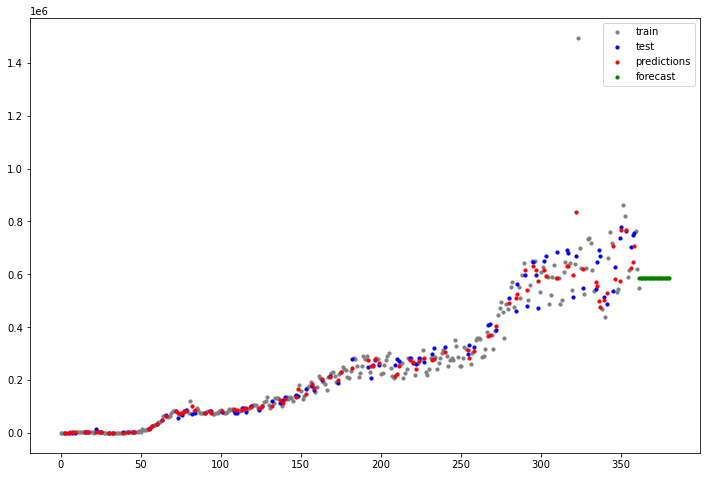

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(Xtrain,ytrain)
ypred = rf_reg.predict(Xtest)
yforecast = rf_reg.predict(Xforecast)


with suppress(Exception):
    score = score.append({
        "Model":'Random Forest Regression',
        "MAE": round(metrics.mean_absolute_error(ypred,ytest),2),
        "RMSE": round(metrics.mean_squared_error(ytest,ypred,squared=False),2),
        "R2 Score": round(metrics.r2_score(ypred,ytest),2)
    },ignore_index = True)
    
    pred_list.insert(4,"Random Forest Regression",yforecast)

print(score)

plt.figure(figsize=(12,8))
plt.plot()
plt.scatter(Xtrain,ytrain,label = 'train',c = 'grey',s=10)
plt.scatter(Xtest,ytest,label = 'test',color ='blue',s=10)
plt.scatter(Xtest,ypred,label = 'predictions',color = 'red',s=10)
plt.scatter(Xforecast,yforecast,label = 'forecast',color = 'green',s=10)
plt.legend()

In [88]:
# point prediction
pred_list

,date,Support Vector Regression,Linear Regression,Polynomial Regression,Random Forest Regression
0,2021-01-01,310168.352739,622739.161322,726582.179637,584733.65
1,2021-01-02,311023.952318,624758.557801,729254.428939,584733.65
2,2021-01-03,311884.292048,626777.954279,731899.865365,584733.65
3,2021-01-04,312749.385024,628797.350758,734517.955203,584733.65
4,2021-01-05,313619.244341,630816.747236,737108.161586,584733.65
5,2021-01-06,314493.883093,632836.143715,739669.944488,584733.65
6,2021-01-07,315373.314374,634855.540193,742202.760731,584733.65
7,2021-01-08,316257.551278,636874.936672,744706.063979,584733.65
8,2021-01-09,317146.606900,638894.333150,747179.304740,584733.65
9,2021-01-10,318040.494334,640913.729629,749621.930366,584733.65


In [89]:
score

,Model,MAE,RMSE,R2 Score
0,Support Vector Regression,177688.41,215668.40,-44.62
1,Linear Regression,58131.40,72334.89,0.90
2,Polynomial Regression,34931.38,51009.30,0.95
3,Random Forest Regression,27827.08,49588.08,0.96
